In [1]:
import pandas as pd 
import numpy as np 
import requests
from io import BytesIO

In [3]:
file_path="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/auto.csv" 


response = requests.get(file_path)
if response.status_code ==200:
    df=pd.read_csv(BytesIO(response.content))
else:
    print(f"failed with status code :{response.status_code}")

df.to_csv("auto.csv")

In [6]:

df1 = df.replace('?',np.NaN)
df.head()

headers
 ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type', 'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']


,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250


symboling
False    205
Name: symboling, dtype: int64

normalized-losses
False    164
True      41
Name: normalized-losses, dtype: int64

make
False    205
Name: make, dtype: int64

fuel-type
False    205
Name: fuel-type, dtype: int64

aspiration
False    205
Name: aspiration, dtype: int64

num-of-doors
False    203
True       2
Name: num-of-doors, dtype: int64

body-style
False    205
Name: body-style, dtype: int64

drive-wheels
False    205
Name: drive-wheels, dtype: int64

engine-location
False    205
Name: engine-location, dtype: int64

wheel-base
False    205
Name: wheel-base, dtype: int64

length
False    205
Name: length, dtype: int64

width
False    205
Name: width, dtype: int64

height
False    205
Name: height, dtype: int64

curb-weight
False    205
Name: curb-weight, dtype: int64

engine-type
False    205
Name: engine-type, dtype: int64

num-of-cylinders
False    205
Name: num-of-cylinders, dtype: int64

engine-size
False    205
Name: engine-size, dtype: int64

fuel-system
Fa

Text(0.5, 1.0, 'horsepower bins')

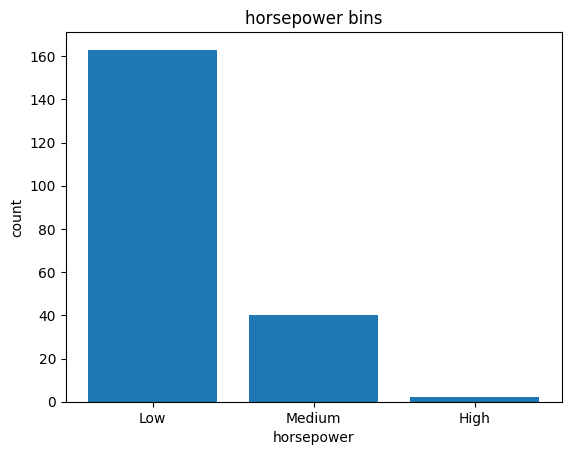

In [12]:
import pandas as pd 
import numpy as np
import requests
from io import BytesIO
import matplotlib as plt 
from matplotlib import pyplot 

file_path="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/auto.csv"
headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]
response = requests.get(file_path)
df = pd.read_csv(BytesIO(response.content),names=headers)
df.replace('?',np.NaN, inplace=True)

#Check Missing values 
missing_data = df.isnull()
for column in missing_data.columns.values.tolist():
    print(column)
    print(missing_data[column].value_counts())
    print("")

#Replacing with mean value 
avg_norm_loss = df["normalized-losses"].astype("float").mean(axis=0)
df["normalized-losses"].replace(np.nan, avg_norm_loss, inplace=True)

#Replacing with most frequent value 
most_frequent_doors = df['num-of-doors'].value_counts().idxmax()
df['num-of-doors'].replace(np.nan,most_frequent_doors, inplace=True)

#Convert Data types 
df[['bore','stroke']] =df[['bore','stroke']].astype("float")

#data-transfromation 
df['city-L/100km'] = 235/df['city-mpg']

#data normalisation 
df['length'] = df['length']/df['length'].max() 

#Convert data to correct format and binning  
mean_horsepower = df['horsepower'].astype("float").mean(axis=0) 
df['horsepower'].replace(np.nan,mean_horsepower, inplace=True)
df['horsepower'] = df['horsepower'].astype(int,copy=True)

bins = np.linspace(min(df['horsepower']),max(df['horsepower']),4)
group_name = ['Low','Medium','High']
df['horsepower-binned'] = pd.cut(df['horsepower'],bins, labels=group_name,include_lowest=True)
print(df[['horsepower','horsepower-binned']].head())
print(df['horsepower-binned'].value_counts())

pyplot.bar(group_name, df["horsepower-binned"].value_counts())

# set x/y labels and plot title
plt.pyplot.xlabel("horsepower")
plt.pyplot.ylabel("count")
plt.pyplot.title("horsepower bins")
# print(missing_data.head())
# print(df.head())

Text(0.5, 1.0, 'horsepower bins')

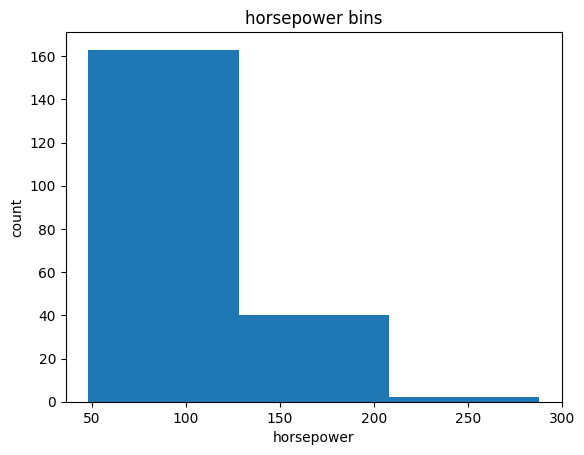